In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
print(os.getcwd())

/Users/deng/ws/sports_data_analysis


In [3]:
files = glob.glob('../data/garmin/*_en.csv')

dfs = []

for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

df = df[['Activity Type', 'Date', 'Title', 'Distance', 'Time', 'Calories', 'Avg Pace']]

columns_to_convert = ['Distance', 'Avg Pace']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Activity Type  1687 non-null   object 
 1   Date           1687 non-null   object 
 2   Title          1687 non-null   object 
 3   Distance       1279 non-null   float64
 4   Time           1687 non-null   object 
 5   Calories       1687 non-null   object 
 6   Avg Pace       155 non-null    float64
dtypes: float64(2), object(5)
memory usage: 92.4+ KB


In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
df['Day'] = df['Date'].dt.day_name()
df['Hour'] = df['Date'].dt.hour

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687 entries, 0 to 1686
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Activity Type  1687 non-null   object        
 1   Date           1687 non-null   datetime64[ns]
 2   Title          1687 non-null   object        
 3   Distance       1279 non-null   float64       
 4   Time           1687 non-null   object        
 5   Calories       1687 non-null   object        
 6   Avg Pace       155 non-null    float64       
 7   Month          1687 non-null   period[M]     
 8   Hour           1687 non-null   int32         
 9   Day            1687 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(5), period[M](1)
memory usage: 125.3+ KB


In [26]:
df.head()


,Activity Type,Date,Title,Distance,Time,Calories,Avg Pace,Month,Hour,Day
0,Pool Swim,2023-12-31 09:54:32,BAC Swimming,NaN,00:48:14,469,NaN,2023-12,9,Sunday
1,Running,2023-12-30 12:17:50,Charlottetown Running,8.68,00:54:10,497,NaN,2023-12,12,Saturday
2,Running,2023-12-28 07:02:09,Charlottetown Running,8.64,00:54:55,520,NaN,2023-12,7,Thursday
3,Pool Swim,2023-12-27 20:06:51,BAC Swimming,NaN,00:32:58,317,NaN,2023-12,20,Wednesday
4,Running,2023-12-26 09:42:06,Charlottetown Running,8.53,00:54:58,508,NaN,2023-12,9,Tuesday


In [39]:
df_run = df[df['Activity Type'] == 'Running']

monthly_sum = df_run.groupby('Month')['Distance'].sum()
monthly_sum = monthly_sum[monthly_sum > 50] #remove 2017-11 first record

monthly_sum.head()

Month
2017-12    143.92
2018-01    114.77
2018-02     69.59
2018-03    136.78
2018-04    118.59
Freq: M, Name: Distance, dtype: float64

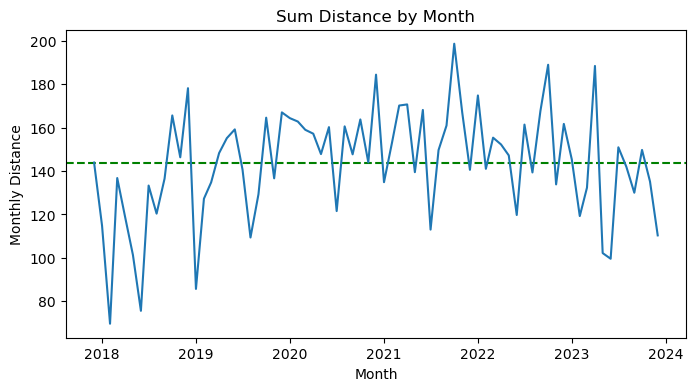

In [40]:
monthly_sum.index = monthly_sum.index.to_timestamp()
plt.figure(figsize=(8, 4)) 
avg = monthly_sum.mean()
plt.axhline(y=avg, color='g', linestyle='--', label='Average')
plt.plot(monthly_sum.index, monthly_sum.values)
plt.title('Sum Distance by Month')
plt.xlabel('Month')
plt.ylabel('Monthly Distance')
plt.show()

In [42]:
monthly_count = df.groupby('Month')['Distance'].count()
monthly_count = monthly_count[monthly_count > 2] #remove 2017-11 first record

monthly_count.head()

Month
2017-12    15
2018-01    13
2018-02     9
2018-03    14
2018-04    14
Freq: M, Name: Distance, dtype: int64

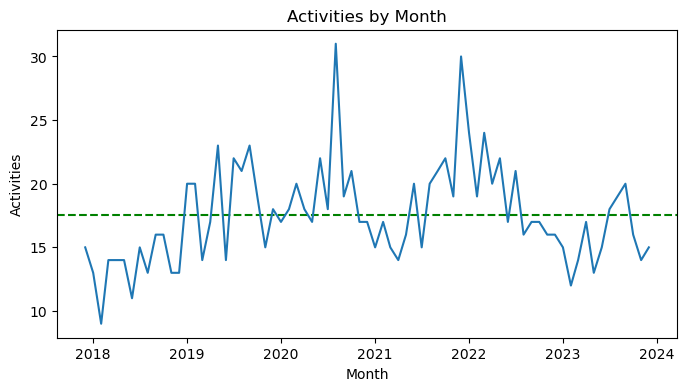

In [43]:
monthly_count.index = monthly_count.index.to_timestamp()
plt.figure(figsize=(8, 4)) 
avg = monthly_count.mean()
plt.axhline(y=avg, color='g', linestyle='--', label='Average')
plt.plot(monthly_count.index, monthly_count.values)
plt.title('Activities by Month')
plt.xlabel('Month')
plt.ylabel('Activities')
plt.show()

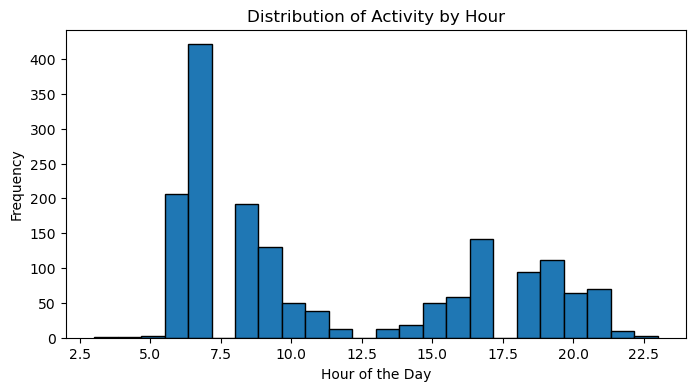

In [45]:
plt.figure(figsize=(8, 4))
plt.hist(df['Hour'], bins=24, edgecolor='black')

plt.title('Distribution of Activity by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

plt.show()

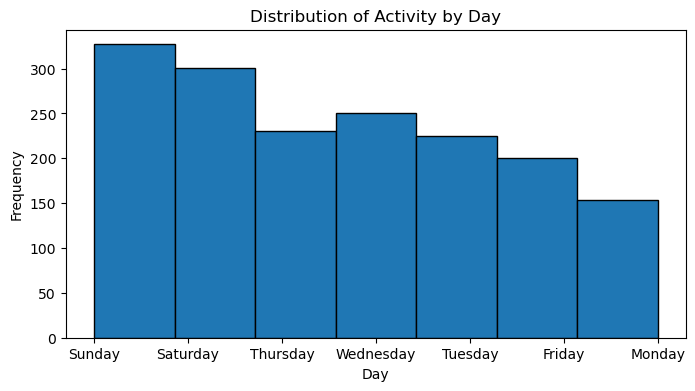

In [44]:
plt.figure(figsize=(8, 4))
plt.hist(df['Day'], bins=7, edgecolor='black')

plt.title('Distribution of Activity by Day')
plt.xlabel('Day')
plt.ylabel('Frequency')

plt.show()